In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# reading data_v0.1_sales.csv
data=pd.read_csv('C:/Develop/git repositories/datamining2/data/clean/data_v0.1_sales.csv')

# Preprocessing

In [4]:
# filter small products
daten=data[(data.cluster=='small')]

In [5]:
#seperate data in (october - december) and january
data_target=daten.iloc[:,93:124]

In [6]:
data_train=daten.iloc[:,0:93]

In [7]:
data_train

,key,2017-10-01_sales,2017-10-02_sales,2017-10-03_sales,2017-10-04_sales,2017-10-05_sales,2017-10-06_sales,2017-10-07_sales,2017-10-08_sales,2017-10-09_sales,...,2017-12-22_sales,2017-12-23_sales,2017-12-24_sales,2017-12-25_sales,2017-12-26_sales,2017-12-27_sales,2017-12-28_sales,2017-12-29_sales,2017-12-30_sales,2017-12-31_sales
0,10000XL ( 158-170 ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100034 ( 39-42 ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100035 ( 43-46 ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10006XL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10008XL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10013L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10013M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10013S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10015L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#compute avg sales per product
data_train['avg']=data_train.mean(axis=1)

In [9]:
#red test data
test0=pd.read_csv('C:/Develop/git repositories/datamining2/data/test/test_0.csv')
test1=pd.read_csv('C:/Develop/git repositories/datamining2/data/test/test_1.csv')
test2=pd.read_csv('C:/Develop/git repositories/datamining2/data/test/test_2.csv')
test3=pd.read_csv('C:/Develop/git repositories/datamining2/data/test/test_3.csv')
test4=pd.read_csv('C:/Develop/git repositories/datamining2/data/test/test_4.csv')

In [10]:
#change type from float to int as preparation for key generation
test0['pid']=test0['pid'].astype(int)
test1['pid']=test1['pid'].astype(int)
test2['pid']=test2['pid'].astype(int)
test3['pid']=test3['pid'].astype(int)
test4['pid']=test4['pid'].astype(int)

In [11]:
#create key function
def keycr(train):
    keys3=[]
    i=0
    while i<len(train):
        key=str(train.iloc[i,1])+str(train.iloc[i,2])
        keys3.append(key)
        i=i+1
    return keys3

In [12]:
#creating the keys for test data
test0['key']=keycr(test0)
test1['key']=keycr(test1)
test2['key']=keycr(test2)
test3['key']=keycr(test3)
test4['key']=keycr(test4)

In [13]:
data_train = data_train.reset_index(drop=True)

In [14]:
# function creates new test data set which includes only the small product
def seperate_test(test):
    i=0 
    arr=[]
    c=0
    test = test.reset_index(drop=True)
    while i<len(data_train):
        if data_train['key'][i] in test['key'].values:
            arr.append(data_train['key'][i])
            c=c+1
        i=i+1
    print('NUMBER OF KEYS OF SMALL PRODUCTS IN TEST')
    print(c)
    i=0 
    test00=test
    while i<len(test):
        if test['key'][i] not in arr:
            test00=test00[test00.key != test['key'][i]]
        i=i+1
    return test00

In [15]:
#applying the function
test0=seperate_test(test0)
test1=seperate_test(test1)
test2=seperate_test(test2)
test3=seperate_test(test3)
test4=seperate_test(test4)

NUMBER OF KEYS OF SMALL PRODUCTS IN TEST
5505
NUMBER OF KEYS OF SMALL PRODUCTS IN TEST
5505
NUMBER OF KEYS OF SMALL PRODUCTS IN TEST
5505
NUMBER OF KEYS OF SMALL PRODUCTS IN TEST
5505
NUMBER OF KEYS OF SMALL PRODUCTS IN TEST
5505


In [16]:
#objective functions from chung
def abs_sales_diff(pred, target):
    assert len(pred) == len(target)
    return sum([abs(pred[i] - target[i]) for i in range(len(pred))])

In [17]:
#function which computes objective function for given data for dates between 1 and 31
def baseline(test):
    j=1
    results=[]
    while j<32:
        pred=[]
        for i in range(len(test)):
            pred.append(j)
        i=0
        test.index=range(len(test))
        targets=[]
        while i<len(test):
            targets.append(int(test['sold_out_date'][i][8:10]))
            i=i+1
        results.append(np.sqrt(abs_sales_diff(pred,targets)))
        j=j+1
    return results
            

In [18]:
#figuring out the optimal baseline for the 5 testsets
results0=baseline(test0)
results1=baseline(test1)
results2=baseline(test2)
results3=baseline(test3)
results4=baseline(test4)

In [19]:
#printing the results
j=1
i=0
while i<len(results0):
    print(j)
    print(results0[i])
    print(results1[i])
    print(results2[i])
    print(results3[i])
    print(results4[i])
    i=i+1
    j=j+1

1
306.109457547
304.985245545
305.697562961
304.704775151
305.481587006
2
297.250735912
296.09289083
296.843393054
295.810750312
296.614227575
3
288.74729436
287.576076891
288.321001663
287.271648444
288.116295964
4
280.599358517
279.429776509
280.171376125
279.123628523
280.007142766
5
272.714136047
271.573194554
272.332517339
271.25449305
272.192946272
6
265.001886786
263.895812775
264.673383626
263.556445567
264.541112117
7
257.447081941
256.386427098
257.163372198
256.037106686
257.070029369
8
250.331779844
249.32107813
250.059992802
248.961844466
249.983999488
9
243.6329206
242.668498162
243.349542839
242.27463755
243.279674449
10
237.432095556
236.548092362
237.162391622
236.160962058
237.116005364
11
231.68728925
230.915568986
231.484340723
230.536331193
231.428174603
12
226.627447587
226.050879229
226.539179834
225.610283454
226.48620267
13
222.110332943
221.684460439
222.078814838
221.244208964
222.06530571
14
218.068796484
217.818731977
218.169658752
217.393652161
218.1192334

In [20]:
avgs=data_train[['key','avg']]

In [21]:
#appending averages sales (oct-dec) of products to test data
test0=pd.merge(test0,avgs,on='key')
test1=pd.merge(test1,avgs,on='key')
test2=pd.merge(test2,avgs,on='key')
test3=pd.merge(test3,avgs,on='key')
test4=pd.merge(test4,avgs,on='key')

# creating ratio sqrt(stock/average_sales)

In [22]:
test0['ratio']=np.sqrt(test0['stock']/test0['avg'])

In [23]:
test1['ratio']=np.sqrt(test1['stock']/test1['avg'])
test2['ratio']=np.sqrt(test2['stock']/test2['avg'])
test3['ratio']=np.sqrt(test3['stock']/test3['avg'])
test4['ratio']=np.sqrt(test4['stock']/test4['avg'])

In [24]:
test0['ratio']

0        6.782330
1        3.033150
2       13.564660
3             inf
4        9.591663
5        5.537749
6             inf
7        3.391165
8        6.394442
9        5.537749
10            inf
11      13.564660
12            inf
13       3.391165
14       3.625308
15       9.591663
16       4.795832
17       4.289522
18       2.768875
19       3.625308
20       3.915780
21       4.289522
22       8.579044
23       4.289522
24       4.795832
25       4.289522
26       4.795832
27       3.915780
28      27.129320
29      21.447611
          ...    
5475          inf
5476          inf
5477          inf
5478    13.564660
5479          inf
5480     5.537749
5481     2.768875
5482     3.915780
5483     3.391165
5484     4.521553
5485     3.915780
5486     6.782330
5487     3.391165
5488     9.591663
5489          inf
5490          inf
5491     6.782330
5492     5.537749
5493     9.591663
5494          inf
5495          inf
5496          inf
5497          inf
5498     2.768875
5499     3

In [25]:
#replace instances with infintive ratio
test0.ratio.replace(to_replace=np.inf, value=0,inplace=True)

In [26]:
test1.ratio.replace(to_replace=np.inf, value=0,inplace=True)
test2.ratio.replace(to_replace=np.inf, value=0,inplace=True)
test3.ratio.replace(to_replace=np.inf, value=0,inplace=True)
test4.ratio.replace(to_replace=np.inf, value=0,inplace=True)

In [27]:
test4['ratio'].describe()

count    5505.000000
mean        4.683470
std         3.970067
min         0.000000
25%         0.000000
50%         4.289522
75%         6.782330
max        42.895221
Name: ratio, dtype: float64

(array([  1.47000000e+03,   9.55000000e+02,   1.28700000e+03,
          8.03000000e+02,   7.29000000e+02,   5.60000000e+01,
          1.23000000e+02,   1.90000000e+01,   3.50000000e+01,
          9.00000000e+00,   3.00000000e+00,   6.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42]),
 <a list of 21 Patch objects>)

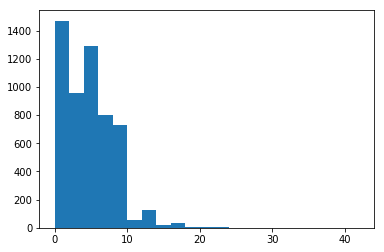

In [28]:
#historgram as basis for creating bins
plt.hist(test2['ratio'],range(0,44,2))

# creating bins
bin0=products with ratio 0  ;  bin0-4=products with ratio 0 - 4  ;  bin4-6=products with ratio 4 - 6 ;  bin6-8=products with ratio 6-8 ; bin10=products with ration >10

after creating the bins I computed with the function above the optimal baseline-date for every bin.

# bin 0 

In [29]:
test0_bin0=test0[test0['ratio']==0]

In [30]:
test1_bin0=test1[test1['ratio']==0]
test2_bin0=test2[test2['ratio']==0]
test3_bin0=test3[test3['ratio']==0]
test4_bin0=test4[test4['ratio']==0]

In [31]:
results_t0bin0=baseline(test0_bin0)
results_t1bin0=baseline(test1_bin0)
results_t2bin0=baseline(test2_bin0)
results_t3bin0=baseline(test3_bin0)
results_t4bin0=baseline(test4_bin0)

In [32]:
print(len(test0_bin0))
print(len(test1_bin0))
print(len(test2_bin0))
print(len(test3_bin0))
print(len(test4_bin0))


1470
1470
1470
1470
1470


In [33]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin0[i])
    print(results_t1bin0[i])
    print(results_t2bin0[i])
    print(results_t3bin0[i])
    print(results_t4bin0[i])
    i=i+1
    j=j+1

1
168.029759269
168.246842467
168.181449631
167.815374743
168.205231785
2
163.670400501
163.91156152
163.826127342
163.444180074
163.844438416
3
159.292184366
159.571300678
159.445915595
159.072310601
159.471000499
4
154.887055624
155.18698399
155.038704845
154.660919433
155.058053644
5
150.479234448
150.781298575
150.635321223
150.233152134
150.608764685
6
146.054784242
146.345481652
146.215594244
145.787516612
146.119813852
7
141.647449677
141.897850583
141.799153735
141.371850098
141.643919742
8
137.36083867
137.568164922
137.502727246
137.091210513
137.291660344
9
133.184083133
133.360413917
133.330416635
132.91350571
133.045105134
10
129.151074328
129.286503549
129.301972143
128.879788951
128.945725016
11
125.203833807
125.263721803
125.343527954
124.915971757
124.927979252
12
121.474277112
121.494855858
121.601809197
121.177555678
121.140414396
13
117.90674281
117.877054595
117.995762636
117.601020404
117.503191446
14
114.39405579
114.293481879
114.45959986
114.087685576
113.9078

In [34]:
#best day=22

# bin0-4

In [35]:
test0_bin0_4=test0[(test0['ratio']>0) & (test0['ratio']<4)]
test1_bin0_4=test1[(test1['ratio']>0) & (test1['ratio']<4)]
test2_bin0_4=test2[(test2['ratio']>0) & (test2['ratio']<4)]
test3_bin0_4=test3[(test3['ratio']>0) & (test3['ratio']<4)]
test4_bin0_4=test4[(test4['ratio']>0) & (test4['ratio']<4)]

In [36]:
print(len(test0_bin0_4))
print(len(test1_bin0_4))
print(len(test2_bin0_4))
print(len(test3_bin0_4))
print(len(test4_bin0_4))

947
972
955
968
988


In [37]:
results_t0bin0_4=baseline(test0_bin0_4)
results_t1bin0_4=baseline(test1_bin0_4)
results_t2bin0_4=baseline(test2_bin0_4)
results_t3bin0_4=baseline(test3_bin0_4)
results_t4bin0_4=baseline(test4_bin0_4)

In [38]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin0_4[i])
    print(results_t1bin0_4[i])
    print(results_t2bin0_4[i])
    print(results_t3bin0_4[i])
    print(results_t4bin0_4[i])
    i=i+1
    j=j+1

1
112.734200667
114.380942469
112.765242872
113.789278933
114.096450427
2
108.719823399
110.285991858
108.733619456
109.681356666
109.927248669
3
105.209315177
106.653645039
105.1760429
106.02829811
106.235587258
4
102.097992145
103.387620149
102.004901843
102.742396312
103.024268986
5
99.2522040058
100.463923873
99.1665266105
99.8098191562
100.189819842
6
96.6953980291
97.8110423214
96.6281532474
97.2111104761
97.6422039899
7
94.3451111611
95.3886785735
94.297401873
94.8050631559
95.3310023025
8
92.2930116531
93.3434518325
92.2659200355
92.7685291465
93.2952303175
9
90.5041435516
91.5259526036
90.5096679919
91.0274683818
91.4767730082
10
89.1291198206
90.1609671643
89.1571646027
89.710645968
90.1443287179
11
88.0397637434
89.134729483
88.1362581461
88.7468309293
89.1739872384
12
87.4299719776
88.5832941361
87.595661993
88.2043082848
88.7242920513
13
87.1148666991
88.3685464405
87.3269717785
87.9886356298
88.6002257333
14
87.1665073294
88.5381273802
87.412813706
88.1476034842
88.836929

In [39]:
#best day=13

# bin4-6

In [40]:
test0_bin4_6=test0[(test0['ratio']>4) & (test0['ratio']<6)]
test1_bin4_6=test1[(test1['ratio']>4) & (test1['ratio']<6)]
test2_bin4_6=test2[(test2['ratio']>4) & (test2['ratio']<6)]
test3_bin4_6=test3[(test3['ratio']>4) & (test3['ratio']<6)]
test4_bin4_6=test4[(test4['ratio']>4) & (test4['ratio']<6)]

In [41]:
print(len(test0_bin4_6))
print(len(test1_bin4_6))
print(len(test2_bin4_6))
print(len(test3_bin4_6))
print(len(test4_bin4_6))

1283
1279
1287
1284
1248


In [42]:
results_t0bin4_6=baseline(test0_bin4_6)
results_t1bin4_6=baseline(test1_bin4_6)
results_t2bin4_6=baseline(test2_bin4_6)
results_t3bin4_6=baseline(test3_bin4_6)
results_t4bin4_6=baseline(test4_bin4_6)

In [43]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin4_6[i])
    print(results_t1bin4_6[i])
    print(results_t2bin4_6[i])
    print(results_t3bin4_6[i])
    print(results_t4bin4_6[i])
    i=i+1
    j=j+1

1
142.954538228
140.616499743
142.863571284
141.894326877
140.139216496
2
138.495487291
136.11024943
138.408814748
137.440896388
135.753452995
3
134.231143927
131.867357598
134.156624883
133.214113366
131.624465811
4
130.165279549
127.929668177
130.134545759
129.243955371
127.74584142
5
126.324977736
124.197423484
126.364551991
125.483066587
124.124937059
6
122.617290787
120.648249055
122.723265928
121.835955284
120.635815577
7
119.004201606
117.230542095
119.197315406
118.346947574
117.281712129
8
115.788600475
114.201576171
116.021549722
115.212846506
114.284732139
9
112.853887837
111.485425056
113.110565377
112.294256309
111.557160236
10
110.249716553
109.050447042
110.485293139
109.717819884
109.128364782
11
108.009258862
106.990653797
108.268185539
107.48023074
107.028033711
12
106.155546252
105.366028681
106.409586034
105.60303026
105.285326613
13
104.604015219
104.014422077
104.852277038
104.057676315
103.821962994
14
103.310212467
102.946588093
103.667738472
102.849404471
102.6

In [44]:
# best day 16

# bin6-8

In [45]:
test0_bin6_8=test0[(test0['ratio']>6) & (test0['ratio']<8)]
test1_bin6_8=test1[(test1['ratio']>6) & (test1['ratio']<8)]
test2_bin6_8=test2[(test2['ratio']>6) & (test2['ratio']<8)]
test3_bin6_8=test3[(test3['ratio']>6) & (test3['ratio']<8)]
test4_bin6_8=test4[(test4['ratio']>6) & (test4['ratio']<8)]

In [46]:
print(len(test0_bin6_8))
print(len(test1_bin6_8))
print(len(test2_bin6_8))
print(len(test3_bin6_8))
print(len(test4_bin6_8))

823
800
803
811
811


In [47]:
results_t0bin6_8=baseline(test0_bin6_8)
results_t1bin6_8=baseline(test1_bin6_8)
results_t2bin6_8=baseline(test2_bin6_8)
results_t3bin6_8=baseline(test3_bin6_8)
results_t4bin6_8=baseline(test4_bin6_8)

In [48]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin6_8[i])
    print(results_t1bin6_8[i])
    print(results_t2bin6_8[i])
    print(results_t3bin6_8[i])
    print(results_t4bin6_8[i])
    i=i+1
    j=j+1

1
119.050409491
117.643529359
117.145209036
118.046600968
119.63277143
2
115.646011604
114.3153533
113.798066767
114.690888915
116.331423098
3
112.352125036
111.121555065
110.566721937
111.422618889
113.119405939
4
109.279458271
108.111054014
107.554637278
108.406641863
110.077245605
5
106.296754419
105.214067501
104.66613588
105.484596032
107.126093927
6
103.305372561
102.313244499
101.774260007
102.547549946
104.168133323
7
100.394222941
99.4685880065
98.939375377
99.6644369873
101.281785134
8
97.5704873412
96.7367561995
96.1977130705
96.8710483065
98.4733466477
9
94.8525170989
94.0744386111
93.5467797415
94.1859862188
95.7705591505
10
92.2388204608
91.6296895116
91.1043357914
91.7387595294
93.2469838654
11
89.7830719011
89.3979865545
88.8425573698
89.5153618101
90.88454214
12
87.5899537618
87.4070935336
86.9252552484
87.6013698523
88.7749964799
13
85.7029754443
85.5920557061
85.1880273278
85.9476584905
86.8792265159
14
83.9880943944
83.9761871009
83.6779540859
84.4748483278
85.11756

In [49]:
#best day 18

# bin8-10

In [50]:
test0_bin8_10=test0[(test0['ratio']>8) & (test0['ratio']<10)]
test1_bin8_10=test1[(test1['ratio']>8) & (test1['ratio']<10)]
test2_bin8_10=test2[(test2['ratio']>8) & (test2['ratio']<10)]
test3_bin8_10=test3[(test3['ratio']>8) & (test3['ratio']<10)]
test4_bin8_10=test4[(test4['ratio']>8) & (test4['ratio']<10)]

In [51]:
print(len(test0_bin8_10))
print(len(test1_bin8_10))
print(len(test2_bin8_10))
print(len(test3_bin8_10))
print(len(test4_bin8_10))

725
729
729
718
736


In [52]:
results_t0bin8_10=baseline(test0_bin8_10)
results_t1bin8_10=baseline(test1_bin8_10)
results_t2bin8_10=baseline(test2_bin8_10)
results_t3bin8_10=baseline(test3_bin8_10)
results_t4bin8_10=baseline(test4_bin8_10)

In [53]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin8_10[i])
    print(results_t1bin8_10[i])
    print(results_t2bin8_10[i])
    print(results_t3bin8_10[i])
    print(results_t4bin8_10[i])
    i=i+1
    j=j+1

1
111.977676347
111.422618889
112.636583755
110.471715837
112.035708593
2
108.81176407
108.18502669
109.444049633
107.275346655
108.793382152
3
105.768615383
105.047608255
106.33437826
104.201727433
105.669295446
4
102.859126965
102.06860438
103.402127638
101.311401135
102.703456612
5
100.024996876
99.2118944482
100.553468364
98.5088828482
99.8198377077
6
97.2522493313
96.4261375354
97.7650244208
95.7496736287
97.0154626851
7
94.5039681707
93.685644578
95.0
93.0053761887
94.2337519151
8
91.8585869693
90.9945053286
92.3255111007
90.3437878329
91.5204895092
9
89.4483090953
88.5607136376
89.8164795569
87.9090439033
89.0393171582
10
87.2353139503
86.3365507766
87.544274513
85.7088093489
86.7755725997
11
85.1997652579
84.3148859929
85.492689746
83.6899038116
84.6758525201
12
83.4266144585
82.5832912883
83.6899038116
81.9512049942
82.8975271043
13
81.8107572389
81.0370285734
82.0548596976
80.4238770515
81.2896057316
14
80.4238770515
79.724525712
80.6349800025
79.1075217663
79.9624912068
15
7

In [54]:
# best day 18

# bin10

In [55]:
test0_bin10=test0[(test0['ratio']>10)]
test1_bin10=test1[(test1['ratio']>10)]
test2_bin10=test2[(test2['ratio']>10)]
test3_bin10=test3[(test3['ratio']>10)]
test4_bin10=test4[(test4['ratio']>10)]

In [56]:
print(len(test0_bin10))
print(len(test1_bin10))
print(len(test2_bin10))
print(len(test3_bin10))
print(len(test4_bin10))

257
255
261
254
252


In [57]:
results_t0bin10=baseline(test0_bin10)
results_t1bin10=baseline(test1_bin10)
results_t2bin10=baseline(test2_bin10)
results_t3bin10=baseline(test3_bin10)
results_t4bin10=baseline(test4_bin10)

In [58]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin10[i])
    print(results_t1bin10[i])
    print(results_t2bin10[i])
    print(results_t3bin10[i])
    print(results_t4bin10[i])
    i=i+1
    j=j+1

1
74.9132832013
74.81978348
75.0333259292
73.9053448676
74.1956872062
2
73.1778655059
73.0958275143
73.2734604069
72.1664742107
72.4775827411
3
71.442284398
71.3442359269
71.5122367151
70.4272674466
70.7601582813
4
69.6921803361
69.5485441976
69.7065276714
68.6585755751
69.0144912319
5
67.9411510059
67.7200118133
67.8675180038
66.8580586018
67.2383818961
6
66.1740130263
65.8407168855
66.022723361
65.038450166
65.4293512118
7
64.3583716388
63.921827258
64.1248781675
63.1822759957
63.5688603013
8
62.5699608438
61.9919349593
62.2173609212
61.3351449008
61.6846820532
9
60.7782855961
60.0333240792
60.3158354
59.4642749893
59.7578446733
10
58.9660919512
58.0430874437
58.36951259
57.5673518585
57.7667724561
11
57.1489282489
56.0178542966
56.4092191047
55.6596802003
55.8121850495
12
55.3082272361
54.1202365109
54.5618914628
53.7959106253
53.9536838409
13
53.4976635004
52.2302594288
52.7825728816
51.9037570894
52.163205423
14
51.7204021639
50.3686410379
51.0392006207
50.0199960016
50.3686410379

In [59]:
#best day 24

# creating the ruleset

In [60]:
def predictor(test):
    predictions=[]
    i=0
    while i<len(test):
        if test['ratio'][i]==0:
            predictions.append(22)
        elif (test['ratio'][i]>0) & (test['ratio'][i]<4):
            predictions.append(13)
        elif (test['ratio'][i]>4) & (test['ratio'][i]<6):
            predictions.append(16)
        elif (test['ratio'][i]>6) & (test['ratio'][i]<8):
            predictions.append(18)
        elif (test['ratio'][i]>8) & (test['ratio'][i]<10):
            predictions.append(18)
        elif test['ratio'][i]>10:
            predictions.append(24)
        i=i+1
    return predictions

# Make predictions

In [61]:
predictions_test0=predictor(test0)

In [62]:
predictions_test1=predictor(test1)
predictions_test2=predictor(test2)
predictions_test3=predictor(test3)
predictions_test4=predictor(test4)

In [63]:
def get_targets(test):
    targets=[]
    i = 0
    while i<len(test):
        targets.append(int(test['sold_out_date'][i][8:10]))
        i=i+1
    return targets

# Results

In [64]:
result_test0=np.sqrt(abs_sales_diff(predictions_test0,get_targets(test0)))
result_test1=np.sqrt(abs_sales_diff(predictions_test1,get_targets(test1)))
result_test2=np.sqrt(abs_sales_diff(predictions_test2,get_targets(test2)))
result_test3=np.sqrt(abs_sales_diff(predictions_test3,get_targets(test3)))
result_test4=np.sqrt(abs_sales_diff(predictions_test4,get_targets(test4)))

In [65]:
print(result_test0)
print(result_test1)
print(result_test2)
print(result_test3)
print(result_test4)

206.627684496
206.685751807
206.850187334
206.266817496
206.441274943


In [66]:
np.mean([result_test0,result_test1,result_test2,result_test3,result_test4])

206.5743432150386

In [67]:
np.std([result_test0,result_test1,result_test2,result_test3,result_test4])

0.20180504315848907

In [68]:
def predictor_2(test):
    predictions=[]
    i=0
    while i<len(test):
        if test['ratio'][i]==0:
            predictions.append(22)
        elif (test['ratio'][i]>0) & (test['ratio'][i]<4):
            predictions.append(15)
        elif (test['ratio'][i]>4) & (test['ratio'][i]<8):
            predictions.append(17)
        elif (test['ratio'][i]>8) & (test['ratio'][i]<10):
            predictions.append(18)
        #elif (test['ratio'][i]>8) & (test['ratio'][i]<10):
        #    predictions.append(18)
        elif test['ratio'][i]>10:
            predictions.append(23)
        i=i+1
    return predictions
predictions_test0=predictor_2(test0)
predictions_test1=predictor_2(test1)
predictions_test2=predictor_2(test2)
predictions_test3=predictor_2(test3)
predictions_test4=predictor_2(test4)
result_test0=np.sqrt(abs_sales_diff(predictions_test0,get_targets(test0)))
result_test1=np.sqrt(abs_sales_diff(predictions_test1,get_targets(test1)))
result_test2=np.sqrt(abs_sales_diff(predictions_test2,get_targets(test2)))
result_test3=np.sqrt(abs_sales_diff(predictions_test3,get_targets(test3)))
result_test4=np.sqrt(abs_sales_diff(predictions_test4,get_targets(test4)))
print(result_test0)
print(result_test1)
print(result_test2)
print(result_test3)
print(result_test4)
print(np.mean([result_test0,result_test1,result_test2,result_test3,result_test4]))
print(np.std([result_test0,result_test1,result_test2,result_test3,result_test4]))

207.026568343
207.270354851
207.325830518
206.792166196
207.188320134
207.120648008
0.192791494659


# Brute forcing for best score

In [69]:
def brute_predictor(test, bins, bases):
    predictions = []
    i = 0
    while i<len(test):
        if (test['ratio'][i] == 0):
            predictions.append(bases[0])
        else:
            got_pred=0
            for b in range(len(bins)-1):
                if (test['ratio'][i] > bins[b] and test['ratio'][i]<bins[b+1]):
                    predictions.append(bases[b+1])
                    got_pred=1
            if(got_pred == 0):
                predictions.append(bases[len(bases)-1])
        i = i+1
    return predictions                

In [70]:
#test the predictor, take the numbers from predictor()
bins = [0,4,6,8,10]
bases = [22, 13, 16, 18, 18, 24]
result_test0 = np.sqrt(abs_sales_diff(brute_predictor(test0, bins, bases), get_targets(test0)))
print(result_test0)
print('should be same as:')
result_test0_validating = np.sqrt(abs_sales_diff(predictor(test0), get_targets(test0)))
print(result_test0_validating)

206.627684496
should be same as:
206.627684496


In [71]:
#function which computes objective function for given data for dates between 1 and 31
#returns the day with the smallest error
def baseline_best(test0, test1, test2, test3, test4):
    best_error = 700 #some init
    base_day = 1
    for j in range(31):
        pred=[]
        for i in range(len(test0)):
            pred.append(j+1)
        test0.index=range(len(test0))
        targets=[]
        for i in range(len(test0)):
            targets.append(int(test0['sold_out_date'][i][8:10]))
        error0 = np.sqrt(abs_sales_diff(pred,targets))
        pred=[]
        for i in range(len(test1)):
            pred.append(j+1)
        test1.index=range(len(test1))
        targets=[]
        for i in range(len(test1)):
            targets.append(int(test1['sold_out_date'][i][8:10]))
        error1 = np.sqrt(abs_sales_diff(pred,targets))
        pred=[]
        for i in range(len(test2)):
            pred.append(j+1)
        test2.index=range(len(test2))
        targets=[]
        for i in range(len(test2)):
            targets.append(int(test2['sold_out_date'][i][8:10]))
        error2 = np.sqrt(abs_sales_diff(pred,targets))
        pred=[]
        for i in range(len(test3)):
            pred.append(j+1)
        test3.index=range(len(test3))
        targets=[]
        for i in range(len(test3)):
            targets.append(int(test3['sold_out_date'][i][8:10]))
        error3 = np.sqrt(abs_sales_diff(pred,targets))
        pred=[]
        for i in range(len(test4)):
            pred.append(j+1)
        test4.index=range(len(test4))
        targets=[]
        for i in range(len(test4)):
            targets.append(int(test4['sold_out_date'][i][8:10]))
        error4 = np.sqrt(abs_sales_diff(pred,targets))
        error = np.mean([error0, error1, error2, error3, error4])
        if (error < best_error):
            best_error = error
            base_day = j+1
    return base_day

In [72]:
#test Baseline best
print(baseline_best(test0, test1, test2, test3, test4)) #should give the 18th

18


In [73]:
import itertools
def brute_force_optimizer():
    #See if we can find the optimal bin range
    #Seeing the histogram, let's not consider bins above 10 for now
    #you can add mor possible borders here, but this will take a while
    #0 stays fixed
    count=0
    possible_bins = [1,2,3,4,5,6,8,10]
    print('Trying', str(2**len(possible_bins)), 'possible combinations, this can run a while')
    best_bases = []
    best_bins = []
    best_error = 700 #init again
    test0_bin0=test0[test0['ratio']==0]
    test1_bin0=test1[test1['ratio']==0]
    test2_bin0=test2[test2['ratio']==0]
    test3_bin0=test3[test3['ratio']==0]
    test4_bin0=test4[test4['ratio']==0]
    base_0 = baseline_best(test0_bin0, test1_bin0, test2_bin0, test3_bin0, test4_bin0)
    for L in range(0, len(possible_bins)+1):
        for subset in itertools.combinations(possible_bins, L):   
            #define the bins
            bins = []
            bins.append(0)
            for i in subset:
                bins.append(i)
            #find the best baselines for each bin
            bases = []
            bases.append(base_0)
            for i in range(len(bins)-1):
                test_0 = test0[(test0['ratio']>bins[i]) & (test0['ratio']< bins[i+1])]
                test_1 = test1[(test1['ratio']>bins[i]) & (test1['ratio']< bins[i+1])]
                test_2 = test2[(test2['ratio']>bins[i]) & (test2['ratio']< bins[i+1])]
                test_3 = test3[(test3['ratio']>bins[i]) & (test3['ratio']< bins[i+1])]
                test_4 = test4[(test4['ratio']>bins[i]) & (test4['ratio']< bins[i+1])]
                bases.append(baseline_best(test_0, test_1, test_2, test_3, test_4))
            test_0 = test0[test0['ratio']>bins[len(bins)-1]]
            test_1 = test1[test1['ratio']>bins[len(bins)-1]]
            test_2 = test2[test2['ratio']>bins[len(bins)-1]]
            test_3 = test3[test3['ratio']>bins[len(bins)-1]]
            test_4 = test4[test4['ratio']>bins[len(bins)-1]]
            bases.append(baseline_best(test_0, test_1, test_2, test_3, test_4))

            #evaluate those bins, track the best:
            errors = []
            errors.append(np.sqrt(brute_predictor(test0, bins, bases)))
            errors.append(np.sqrt(brute_predictor(test1, bins, bases)))
            errors.append(np.sqrt(brute_predictor(test2, bins, bases)))
            errors.append(np.sqrt(brute_predictor(test3, bins, bases)))
            errors.append(np.sqrt(brute_predictor(test4, bins, bases)))
            
            if (np.mean(errors) < best_error):
                best_bins = bins
                best_bases = bases
            count = count+1
            print(str(count),'th iteration done')
    return best_bins, best_bases

In [74]:
bins, bases = brute_force_optimizer()
print(bins)
print(bases)

Trying 256 possible combinations, this can run a while
1 th iteration done
2 th iteration done
3 th iteration done
4 th iteration done
5 th iteration done
6 th iteration done
7 th iteration done
8 th iteration done
9 th iteration done
10 th iteration done
11 th iteration done
12 th iteration done
13 th iteration done
14 th iteration done
15 th iteration done
16 th iteration done
17 th iteration done
18 th iteration done
19 th iteration done
20 th iteration done
21 th iteration done
22 th iteration done
23 th iteration done
24 th iteration done
25 th iteration done
26 th iteration done
27 th iteration done
28 th iteration done
29 th iteration done
30 th iteration done
31 th iteration done
32 th iteration done
33 th iteration done
34 th iteration done
35 th iteration done
36 th iteration done
37 th iteration done
38 th iteration done
39 th iteration done
40 th iteration done
41 th iteration done
42 th iteration done
43 th iteration done
44 th iteration done
45 th iteration done
46 th ite

In [75]:
best_errors = []
best_errors.append(np.sqrt(abs_sales_diff(brute_predictor(test0, bins, bases), get_targets(test0))))
best_errors.append(np.sqrt(abs_sales_diff(brute_predictor(test1, bins, bases), get_targets(test1))))
best_errors.append(np.sqrt(abs_sales_diff(brute_predictor(test2, bins, bases), get_targets(test2))))
best_errors.append(np.sqrt(abs_sales_diff(brute_predictor(test3, bins, bases), get_targets(test3))))
best_errors.append(np.sqrt(abs_sales_diff(brute_predictor(test4, bins, bases), get_targets(test4))))
error = np.mean(best_errors)
std = np.std(best_errors)
for i in best_errors:
    print(i)
print('Mean:', str(error))
print('Std', str(std))

206.574441788
206.695428106
206.828431314
206.220755502
206.371025098
Mean: 206.538016362
Std 0.218626004277
